In [70]:
import os
from tqdm import tqdm
from glob import glob

import numpy as np
import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
nickel_path = "./nickels"
nickel_files = glob(f"{nickel_path}/*")

quarters_path = "./quarters"
quarters_files = glob(f"{quarters_path}/*")

cents_path = "./cents"
cents_files = glob(f"{cents_path}/*")

In [72]:
def detect_and_crop_coin_from_background(img_save_path, img_file_name, 
                                         blur_kernel_size = 15, dp = 1, minDist = 50, param1 = 50, param2 = 30, minRadius = 20):
    img = Image.open(img_file_name)
    img = np.asarray(img)
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray_img, (blur_kernel_size, blur_kernel_size), 0)

    h, w = blurred.shape
    circles = cv2.HoughCircles(blurred,
                               cv2.HOUGH_GRADIENT,
                               dp = dp, 
                               minDist = minDist,
                               param1 = param1,
                               param2 = param2,
                               minRadius = minRadius,
                               maxRadius = int((h + w)/4))
    
    circles = np.round(circles[0, :]).astype("int")
    valid_circles = [circle for circle in circles if circle[2] > 30]
    best_circle = max(valid_circles, key = lambda x: x[2])

    x, y, r = best_circle

    mask = np.zeros_like(img, dtype = 'uint8')
    cv2.circle(mask, (x, y), r, (255, 255, 255), -1)
    mask_1 = mask[:, :, 0]

    cropped = cv2.bitwise_and(img, img, mask = mask_1)
    
    if not os.path.exists(img_save_path):
        os.makedirs(img_save_path)

    img_name = img_file_name.split('/')[-1].split('.')[0]
    cv2.imwrite(f"{img_save_path}/{img_name}.jpg", cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))

# Nickel

In [73]:
nicke_save_path = "./nickels_cropped"
nickel_path = "./nickels"
nickel_files = glob(f"{nickel_path}/*")

for i in range(5):
    detect_and_crop_coin_from_background(nicke_save_path, nickel_files[i])

In [74]:
def read_img(img_file):
    img = Image.open(img_file)
    return np.asarray(img)

nickel_cropped_files = glob(f"{nicke_save_path}/*")

img1 = read_img(nickel_cropped_files[0])
img2 = read_img(nickel_cropped_files[1])
img3 = read_img(nickel_cropped_files[2])
img4 = read_img(nickel_cropped_files[3])
img5 = read_img(nickel_cropped_files[4])

imgs = [img1, img2, img3, img4, img5]

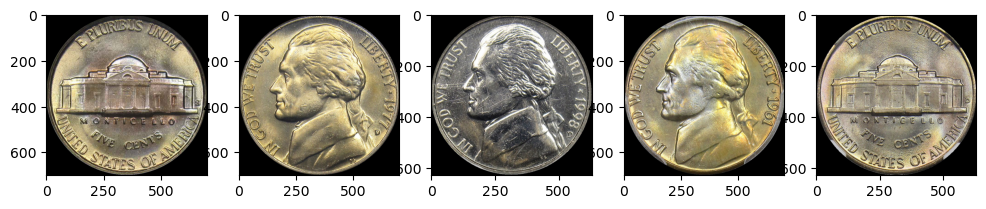

In [75]:
fig, axs = plt.subplots(1, 5, figsize = (12, 12))
for ind, ax in enumerate(axs):
    ax.imshow(imgs[ind])

<Axes: xlabel='val', ylabel='Count'>

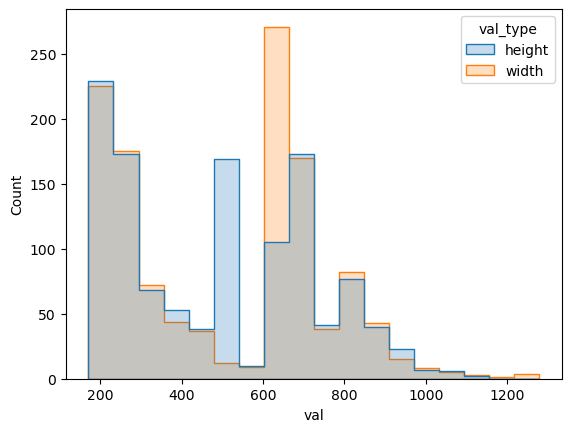

In [43]:
import warnings
warnings.filterwarnings("ignore")

w = []
h = []
for file in nickel_files:
    img1 = read_img(file)
    h.append(img1.shape[0])
    w.append(img1.shape[1])

df = pd.DataFrame({"height": h, "width": w})
df_temp = pd.DataFrame({"val": h + w, "val_type": ["height"]*len(h) + ['width']*len(w)})
sns.histplot(df_temp, x = "val", hue = "val_type", element = 'step', common_norm = False)

In [46]:
df[df['height'] != df['width']]

height  width
14       817    822
15       440    446
16       890    893
17       783    787
18       888    884
...      ...    ...
1161     479    639
1162     479    639
1163     479    639
1164     480    640
1165     480    640

[886 rows x 2 columns]

In [52]:
temp = df[(df['width'] < 600 )& (df['width'] > 400)].copy()
temp[temp['height'] > temp['width']]

height  width
141     452    450
150     547    534
173     567    558
236     566    564
335     518    514
376     566    540
496     416    401

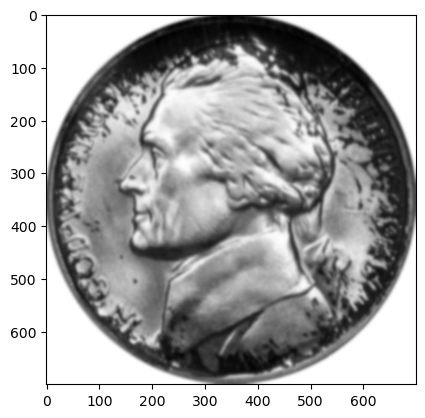

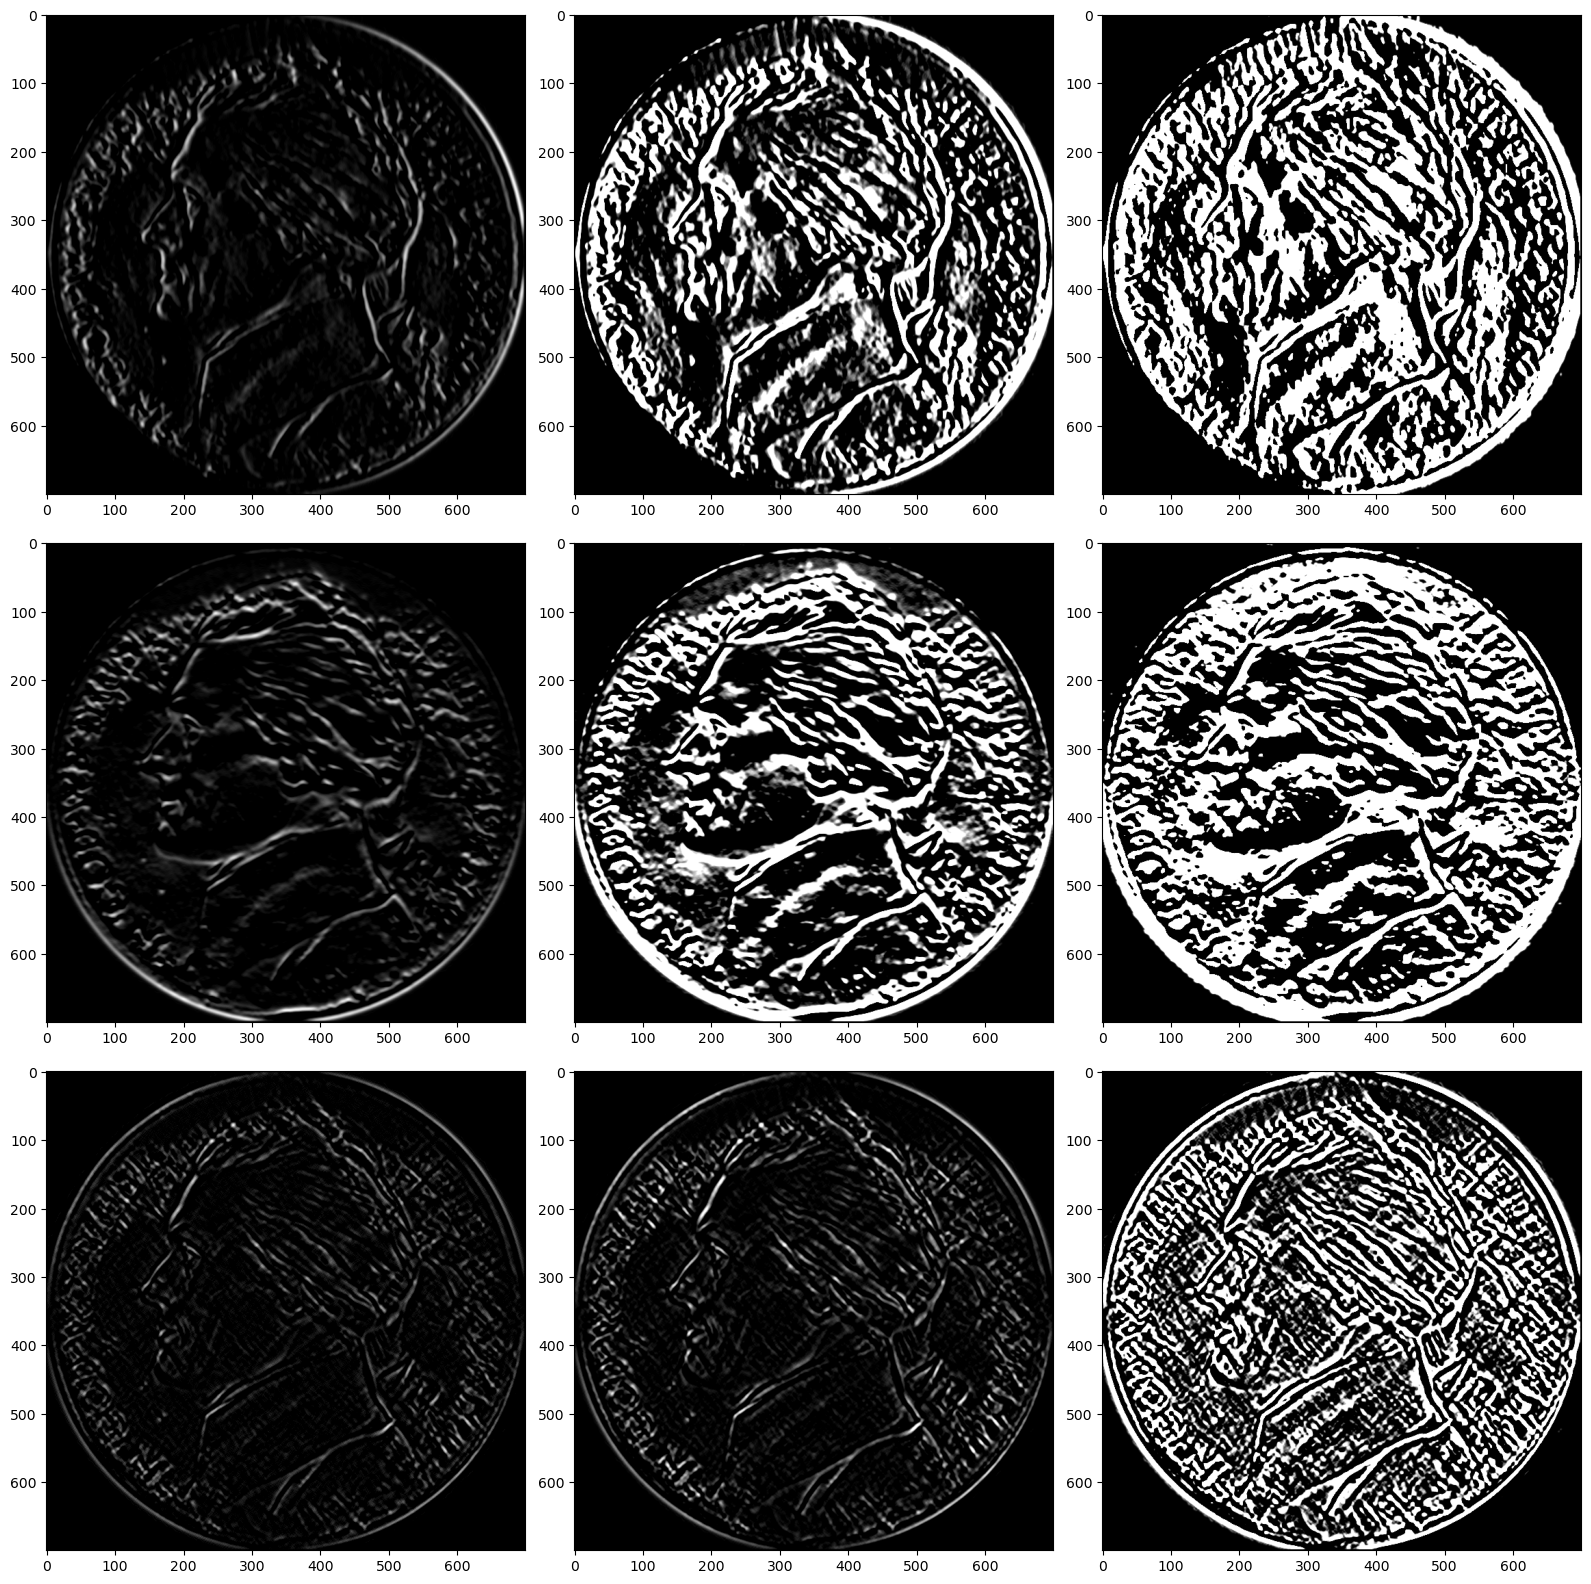

In [58]:
blur_kernel_size = 15
gray_img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray_img, (blur_kernel_size, blur_kernel_size), 0)
plt.imshow(img_blur, cmap = 'gray')

sobel_x_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 3)
sobel_x_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 5)
sobel_x_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 7)

sobel_y_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 3)
sobel_y_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 5)
sobel_y_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 7)

sobel_xy_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 3)
sobel_xy_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 5)
sobel_xy_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 7)

fig, axs = plt.subplots(3, 3, figsize = (16, 16))
axs[0][0].imshow(sobel_x_3, cmap = 'gray')
axs[0][1].imshow(sobel_x_5, cmap = 'gray')
axs[0][2].imshow(sobel_x_7, cmap = 'gray')

axs[1][1].imshow(sobel_y_5, cmap = 'gray')
axs[1][2].imshow(sobel_y_7, cmap = 'gray')
axs[1][0].imshow(sobel_y_3, cmap = 'gray')

axs[2][0].imshow(sobel_xy_3, cmap = 'gray')
axs[2][1].imshow(sobel_xy_5, cmap = 'gray')
axs[2][2].imshow(sobel_xy_7, cmap = 'gray')
fig.tight_layout()

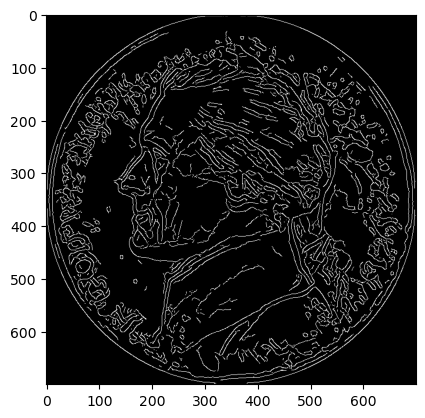

In [59]:
edges = cv2.Canny(image = img_blur, threshold1 = 50, threshold2 = 30)
plt.imshow(edges, cmap = 'gray', vmin = 0, vmax = 255)

In [63]:
edges.shape

(700, 700)

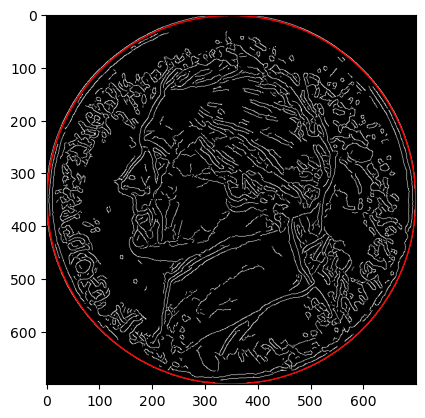

In [65]:
h, w = edges.shape
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20,
    maxRadius = int((w+h)/4)
)
circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key=lambda x: x[2])

plt.imshow(edges, cmap = 'gray')

ax = plt.gca()
x, y, r = best_circle
best_circle_patch = plt.Circle((x, y), r, color = 'red', fill = False, linewidth = 1)
ax.add_patch(best_circle_patch)

plt.show()

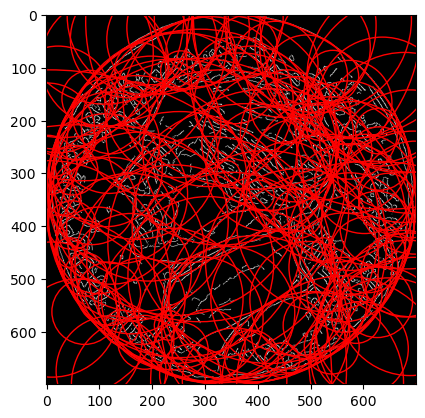

In [62]:
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)
circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key = lambda x: x[2])

plt.imshow(edges, cmap = 'gray')

ax = plt.gca()
for circle in circles:
    x, y, r = circle
    best_circle_patch = plt.Circle((x, y), r, color = 'red', fill = False, linewidth = 1)
    ax.add_patch(best_circle_patch)

plt.show()

# Quarters

In [76]:
quarters_save_path = "./quarters_cropped"
quarters_path = "./quarters"
quarters_files = glob(f"{quarters_path}/*")

for i in range(5):
    detect_and_crop_coin_from_background(quarters_save_path, quarters_files[i])

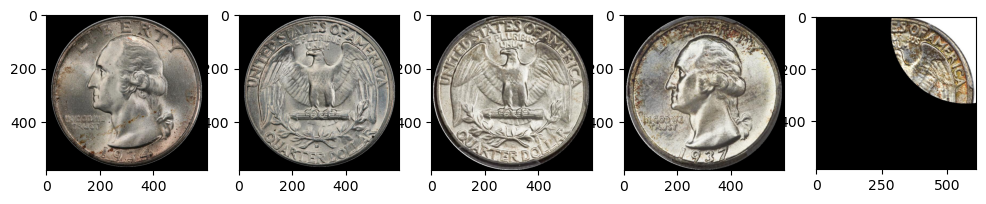

In [78]:
quarters_cropped_files = glob(f"{quarters_save_path}/*")

img1 = read_img(quarters_cropped_files[0])
img2 = read_img(quarters_cropped_files[1])
img3 = read_img(quarters_cropped_files[2])
img4 = read_img(quarters_cropped_files[3])
img5 = read_img(quarters_cropped_files[4])

imgs = [img1, img2, img3, img4, img5]

fig, axs = plt.subplots(1, 5, figsize = (12, 12))
for ind, ax in enumerate(axs):
    ax.imshow(imgs[ind])

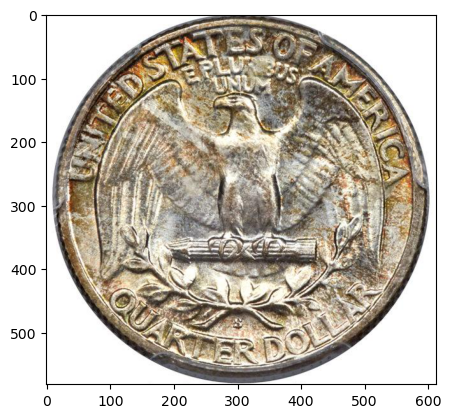

In [77]:
img = read_img(quarters_files[4])
plt.imshow(img)

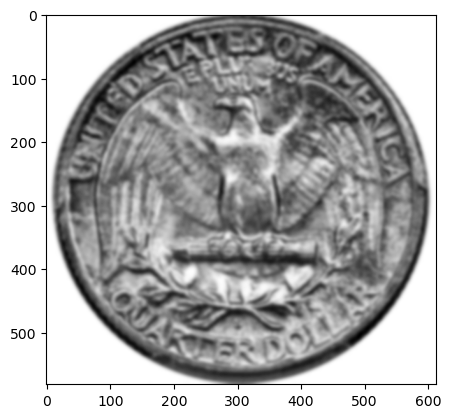

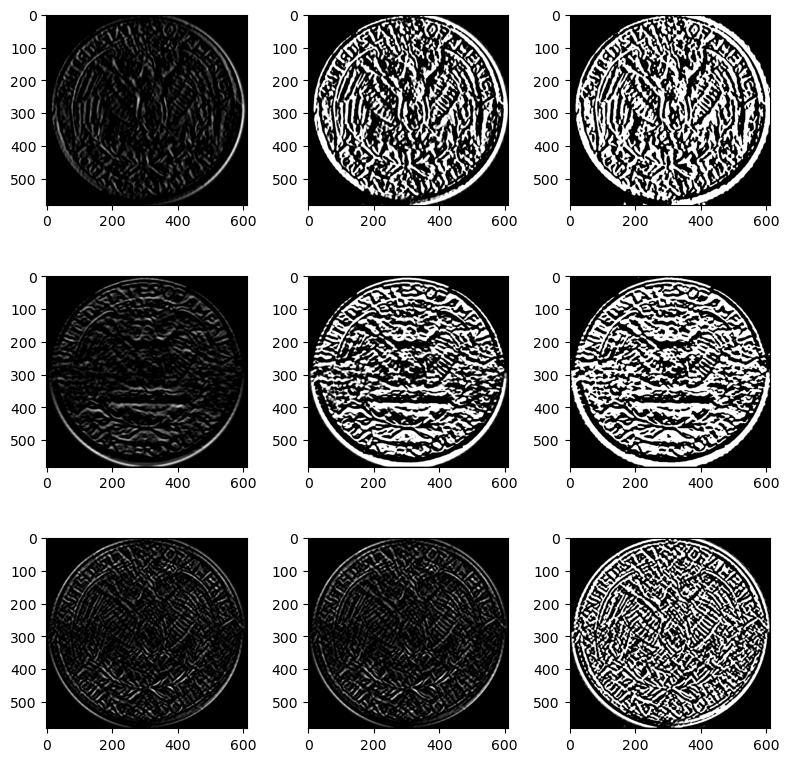

In [80]:
blur_kernel_size = 15
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray_img, (blur_kernel_size, blur_kernel_size), 0)
plt.imshow(img_blur, cmap = 'gray')

sobel_x_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 3)
sobel_x_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 5)
sobel_x_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 0, ksize = 7)

sobel_y_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 3)
sobel_y_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 5)
sobel_y_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 0, dy = 1, ksize = 7)

sobel_xy_3 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 3)
sobel_xy_5 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 5)
sobel_xy_7 = cv2.Sobel(src = img_blur, ddepth = cv2.CV_8U, dx = 1, dy = 1, ksize = 7)

fig, axs = plt.subplots(3, 3, figsize = (8, 8))
axs[0][0].imshow(sobel_x_3, cmap = 'gray')
axs[0][1].imshow(sobel_x_5, cmap = 'gray')
axs[0][2].imshow(sobel_x_7, cmap = 'gray')

axs[1][1].imshow(sobel_y_5, cmap = 'gray')
axs[1][2].imshow(sobel_y_7, cmap = 'gray')
axs[1][0].imshow(sobel_y_3, cmap = 'gray')

axs[2][0].imshow(sobel_xy_3, cmap = 'gray')
axs[2][1].imshow(sobel_xy_5, cmap = 'gray')
axs[2][2].imshow(sobel_xy_7, cmap = 'gray')
fig.tight_layout()

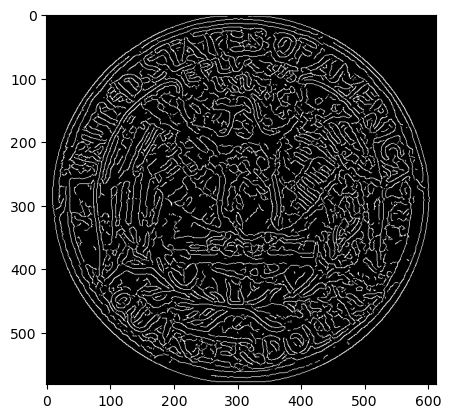

In [81]:
edges = cv2.Canny(image = img_blur, threshold1 = 50, threshold2 = 30)
plt.imshow(edges, cmap = 'gray', vmin = 0, vmax = 255)

In [83]:
h, w = edges.shape
int((h + w)/4)

298

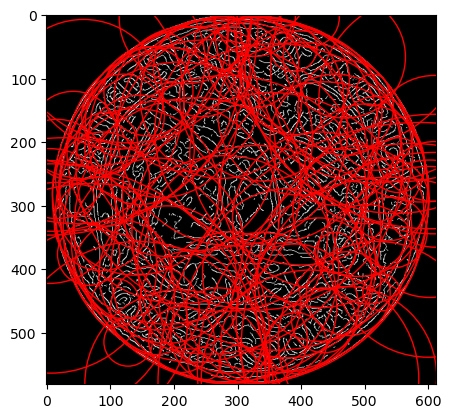

In [84]:
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20
)
circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key = lambda x: x[2])

plt.imshow(edges, cmap = 'gray')

ax = plt.gca()
for circle in circles:
    x, y, r = circle
    best_circle_patch = plt.Circle((x, y), r, color = 'red', fill = False, linewidth = 1)
    ax.add_patch(best_circle_patch)

plt.show()

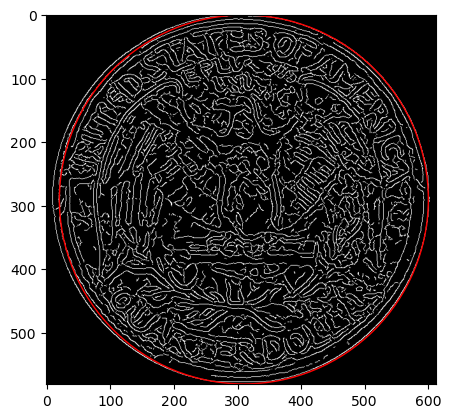

In [89]:
h, w = edges.shape
circles = cv2.HoughCircles(
    edges,
    cv2.HOUGH_GRADIENT,
    dp = 1,
    minDist = 50,
    param1 = 50,
    param2 = 30,
    minRadius = 20,
    maxRadius = max(int(h/2), int(w/2))
)
circles = np.round(circles[0, :]).astype("int")
valid_circles = [circle for circle in circles if circle[2] > 30]
best_circle = max(valid_circles, key=lambda x: x[2])

plt.imshow(edges, cmap = 'gray')

ax = plt.gca()
x, y, r = best_circle
best_circle_patch = plt.Circle((x, y), r, color = 'red', fill = False, linewidth = 1)
ax.add_patch(best_circle_patch)

plt.show()

# Cents

In [90]:
cents_save_path = "./cents_cropped"
cents_path = "./cents"
cents_files = glob(f"{cents_path}/*")

for i in range(5):
    detect_and_crop_coin_from_background(cents_save_path, cents_files[i])

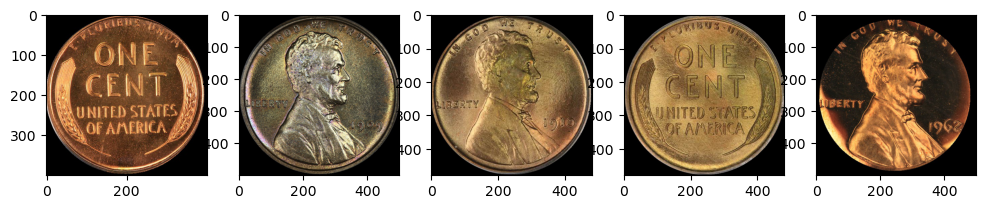

In [91]:
cents_cropped_files = glob(f"{cents_save_path}/*")

img1 = read_img(cents_cropped_files[0])
img2 = read_img(cents_cropped_files[1])
img3 = read_img(cents_cropped_files[2])
img4 = read_img(cents_cropped_files[3])
img5 = read_img(cents_cropped_files[4])

imgs = [img1, img2, img3, img4, img5]

fig, axs = plt.subplots(1, 5, figsize = (12, 12))
for ind, ax in enumerate(axs):
    ax.imshow(imgs[ind])